In [165]:
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

print('Imported all libraries!')

Imported all libraries!


[nltk_data] Downloading package stopwords to C:\Users\AINS-
[nltk_data]     SENGLY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\AINS-
[nltk_data]     SENGLY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:

review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print("Finished Read Files!")

In [53]:
# Possitive y = 1 
print(documents[1])
print(y[1])



# Negative y = 0
print(documents[0])
print(y[0])

good film are hard to find these day ngreat film are beyond rare nproof of life russell crowe one two punch of deft kidnap and rescue thriller is one of those rare gem na taut drama laced with strong and subtle acting an intelligent script and masterful directing together it delivers something virtually unheard of in the film industry these day genuine motivation in story that ring true nconsider the strange coincidence of russell crowe character in proof of life making the move on distraught wife played by meg ryan character in the film all while the real russell crowe wa hitching up with married woman meg ryan in the outside world ni haven seen this much chemistry between actor since mcqueen and mcgraw teamed up in peckinpah masterpiece the getaway nbut enough with the gossip let get to the review nthe film revolves around the kidnapping of peter bowman david morse an american engineer working in south america who is kidnapped during mass ambush of civilian by anti government soldier

[0. 0. 0. ... 0. 0. 0.]
1
[[0. 0. 0. ... 0. 0. 0.]]
1500
1500


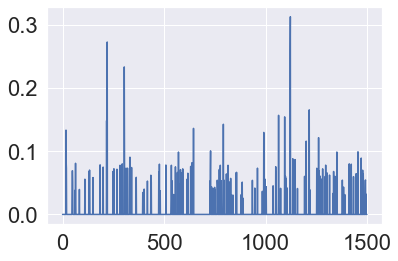

In [54]:
print(X_train[1])
print(Y_train[1])

x = np.reshape(X_train[1],(-1,1500))
print(x)

plt.plot(X_train[1])
plt.show()

print(len(X_train[1]))

print(len(X_train[1000]))


In [55]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
print('Defined sigmoid function!')


Defined sigmoid function!


In [159]:

col_train_j = []
col_test_j = []
col_train_acc = []
col_test_acc = []

num_iter = 100
num_train = 1400
num_test = 600

iput_len = 1500
lay1_len = 150
lay2_len = 15
oput_len = 2

u = np.random.normal(0,1,[iput_len+1,lay1_len])
v = np.random.normal(0,1,[lay1_len+1,lay2_len])
w = np.random.normal(0,1,[lay2_len+1,oput_len])

for iteration in range(num_iter):
    
    sum_train_j = 0
    sum_test_j = 0
    sum_train_acc = 0
    sum_test_acc = 0
    
    for itrain in range(num_train):
    
        input_v = np.append(X_train[itrain],1)
        input_v = np.reshape(input_v, (-1, iput_len+1))
        
        actual_l = np.zeros(oput_len)
        actual_l[Y_train[itrain]] = 1
        
        y_ = input_v.dot(u)
        y = sigmoid(y_)
        y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))
        
        z_ = y.dot(v)
        z = sigmoid(z_)
        z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))

        h_ = z.dot(w)
        h = sigmoid(h_)
        
        dl_dh = -actual_l/h + (1.0 - actual_l)/(1.0 - h)
        dl_dh = np.reshape(dl_dh,(-1,oput_len))

        dh_dhh = sigmoid(h_)*(1 - sigmoid(h_))
        dh_dhh = np.reshape(dh_dhh,(-1,oput_len))

        sigma = dl_dh*dh_dhh
        sigma = np.reshape(sigma,(oput_len,-1))
        
        dl_dw = sigma.dot(z)
        dl_dw = np.transpose(dl_dw)

        w = w - 0.01*dl_dw
        
        ##############################################
        
        sigma_s = w.dot(sigma)  
        sigma_s = sigma_s[:-1]

        dz_dzz = sigmoid(z_)*(1 - sigmoid(z_))
        dz_dzz = np.reshape(dz_dzz,(lay2_len,-1))

        sigma_s_x_dz_dzz = sigma_s*dz_dzz

        dl_dv = sigma_s_x_dz_dzz.dot(y)
        dl_dv = np.transpose(dl_dv)

        v = v - 0.01*dl_dv
        
        ###############################################
        sigma_s1 = v.dot(sigma_s)
        sigma_s1 = sigma_s1[:-1]

        dy_dyy = sigmoid(y_)*(1 - sigmoid(y_))
        dy_dyy = np.reshape(dy_dyy,(lay1_len,-1))

        bb = sigma_s1*dy_dyy

        dl_du = bb.dot(input_v)
        dl_du = np.transpose(dl_du)

        u = u - 0.01*dl_du
        
        sum_train_j += np.sum( -actual_l * np.log(h) - (1 - actual_l) * np.log(1 - h))

        output_l = np.zeros(oput_len)
        output_l[np.argmax(h)] = 1

        dE_dh = actual_l - output_l

        if np.sum(dE_dh**2) == 0:
            sum_train_acc += 1
        
    for itest in range(num_test):

        input_v = np.append(X_test[itest],1)
        input_v = np.reshape(input_v, (-1, len(input_v)))

        actual_l = np.zeros(oput_len)
        actual_l[Y_test[itest]] = 1

        y_ = input_v.dot(u)
        y = sigmoid(y_)
        y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))

        z_ = y.dot(v)
        z = sigmoid(z_)
        z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))

        h_ = z.dot(w)
        h = sigmoid(h_) 

        sum_test_j += np.sum( -actual_l * np.log(h) - (1 - actual_l) * np.log(1 - h))
        output_l = np.zeros(oput_len)
        output_l[np.argmax(h)] = 1

        dE_dh = actual_l - output_l
        if np.sum(dE_dh**2) == 0:
            sum_test_acc += 1
            
    # for validate in range(100):
    # 
    #     rand_int = np.random.randint(400)
    # 
    #     input_v = np.append(X_test[rand_int],1)
    #     input_v = np.reshape(input_v, (-1, iput_len+1))
    # 
    #     actual_l = np.zeros(oput_len)
    #     actual_l[Y_test[rand_int]] = 1
    # 
    #     y_ = input_v.dot(u)
    #     y = sigmoid(y_)
    #     y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))
    # 
    #     z_ = y.dot(v)
    #     z = sigmoid(z_)
    #     z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))
    # 
    #     h_ = z.dot(w)
    #     h = sigmoid(h_)
    # 
    #     dl_dh = -actual_l/h + (1.0 - actual_l)/(1.0 - h)
    #     dl_dh = np.reshape(dl_dh,(-1,oput_len))
    # 
    #     dh_dhh = sigmoid(h_)*(1 - sigmoid(h_))
    #     dh_dhh = np.reshape(dh_dhh,(-1,oput_len))
    # 
    #     sigma = dl_dh*dh_dhh
    #     sigma = np.reshape(sigma,(oput_len,-1))
    # 
    #     dl_dw = sigma.dot(z)
    #     dl_dw = np.transpose(dl_dw)
    # 
    #     w = w - 0.01*dl_dw
    # 
    #     ##############################################
    # 
    #     sigma_s = w.dot(sigma)  
    #     sigma_s = sigma_s[:-1]
    # 
    #     dz_dzz = sigmoid(z_)*(1 - sigmoid(z_))
    #     dz_dzz = np.reshape(dz_dzz,(lay2_len,-1))
    # 
    #     sigma_s_x_dz_dzz = sigma_s*dz_dzz
    # 
    #     dl_dv = sigma_s_x_dz_dzz.dot(y)
    #     dl_dv = np.transpose(dl_dv)
    # 
    #     v = v - 0.01*dl_dv
    # 
    #     ###############################################
    #     sigma_s1 = v.dot(sigma_s)
    #     sigma_s1 = sigma_s1[:-1]
    # 
    #     dy_dyy = sigmoid(y_)*(1 - sigmoid(y_))
    #     dy_dyy = np.reshape(dy_dyy,(lay1_len,-1))
    # 
    #     bb = sigma_s1*dy_dyy
    # 
    #     dl_du = bb.dot(input_v)
    #     dl_du = np.transpose(dl_du)
    # 
    #     u = u - 0.01*dl_du
    #     
        
      
    col_train_j.append(sum_train_j/num_train)
    col_test_j.append(sum_test_j/num_test)
    col_train_acc.append(sum_train_acc/num_train)
    col_test_acc.append(sum_test_acc/num_test)
    
    print('iteration: %2d , Train Error: %.4f, Train Acc: %.4f' % (iteration,sum_train_j/num_train,sum_train_acc/num_train))
    print('              , Test  Error: %.4f, Test  Acc: %.4f' % (sum_test_j/num_test,sum_test_acc/num_test))
      

print('Network trained!')

iteration:  0 , Train Error: 1.4570, Train Acc: 0.5064
              , Test  Error: 1.4063, Test  Acc: 0.5233
iteration:  1 , Train Error: 1.3576, Train Acc: 0.5779
              , Test  Error: 1.3697, Test  Acc: 0.5683
iteration:  2 , Train Error: 1.2978, Train Acc: 0.6264
              , Test  Error: 1.3132, Test  Acc: 0.6067
iteration:  3 , Train Error: 1.2231, Train Acc: 0.6714
              , Test  Error: 1.2522, Test  Acc: 0.6367
iteration:  4 , Train Error: 1.1283, Train Acc: 0.7207
              , Test  Error: 1.1898, Test  Acc: 0.6733
iteration:  5 , Train Error: 1.0208, Train Acc: 0.7664
              , Test  Error: 1.1242, Test  Acc: 0.7033
iteration:  6 , Train Error: 0.9186, Train Acc: 0.8043
              , Test  Error: 1.0676, Test  Acc: 0.7267
iteration:  7 , Train Error: 0.8159, Train Acc: 0.8264
              , Test  Error: 1.0245, Test  Acc: 0.7450
iteration:  8 , Train Error: 0.7215, Train Acc: 0.8493
              , Test  Error: 0.9886, Test  Acc: 0.7550
iteration:

In [57]:
print(col_train_j)


[1.433631406254076, 1.3907863952205872, 1.3396125833573993, 1.1794639342927176, 1.0513856313111558, 0.9313206526645271, 0.820814388908537, 0.7202235888935579, 0.6297632607001163, 0.5510863725933278, 0.47825063031968185, 0.41767465857060904, 0.3627634449266792, 0.3125684490406901, 0.2761718105711567, 0.23958289837506003, 0.2074579696105862, 0.17626912628371408, 0.15156091934667723, 0.1301428275314737, 0.1127752611648994, 0.094191740573305, 0.08273181890304471, 0.0718750672071408, 0.06981480659144686, 0.05735442903903277, 0.05180455264055656, 0.04961771827747737, 0.04313724696555751, 0.03907278335289706, 0.03595779744122663, 0.033054134215155115, 0.03049200674072216, 0.030494913931366763, 0.0284834543947786, 0.02719660336649534, 0.02467740811679422, 0.023207995261070518, 0.02267984080132635, 0.020169795899009538, 0.019147066139874037, 0.01919389625572351, 0.01771608962651874, 0.016141340841418692, 0.01580678079412785, 0.014903870714343933, 0.014257791550060203, 0.013927890913030299, 0.01

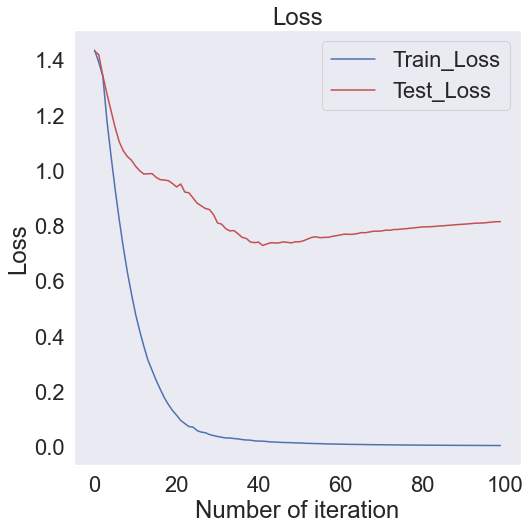

In [58]:
plt.figure(figsize=(8,8))
plt.plot(col_train_j,'b-')
plt.plot(col_test_j,'r-')
plt.title('Loss')
plt.legend(['Train_Loss','Test_Loss'])
plt.ylabel('Loss')
plt.xlabel('Number of iteration')

plt.grid()
plt.show()

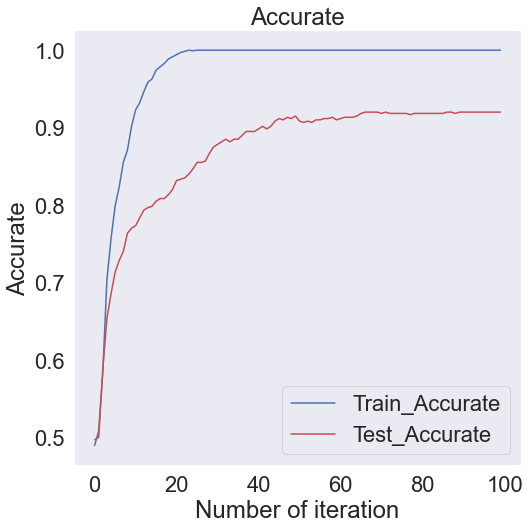


	 Training Accurate: 1.0000  Testing Accurate: 0.9200


In [59]:
plt.figure(figsize=(8,8))
plt.plot(col_train_acc,'b-')
plt.plot(col_test_acc,'r-')
plt.grid()
plt.title('Accurate')
plt.legend(['Train_Accurate','Test_Accurate'])
plt.ylabel('Accurate')
plt.xlabel('Number of iteration')

plt.show()

print()
print('\t Training Accurate: %.4f  Testing Accurate: %.4f' % (col_train_acc[-1], col_test_acc[-1]))


702
698
0
0
1.0
1.0
0.0
0.0


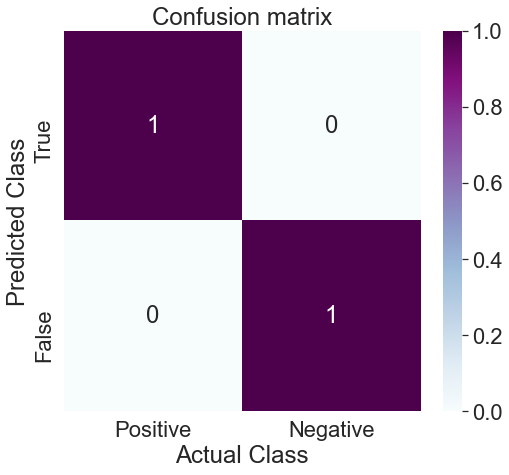

In [166]:
    
count_tp = 0
count_tn = 0

count_fp = 0
count_fn = 0

# u = np.random.normal(0,1,[iput_len+1,lay1_len])
# v = np.random.normal(0,1,[lay1_len+1,lay2_len])
# w = np.random.normal(0,1,[lay2_len+1,oput_len])

rand_int = np.random.randint(400)

for rand_int in range(1400):

    input_v = np.append(X_train[rand_int],1)
    input_v = np.reshape(input_v, (-1, len(input_v)))
    
    actual_l = np.zeros(oput_len)
    actual_l[Y_train[rand_int]] = 1
    
    y_ = input_v.dot(u)
    y = sigmoid(y_)
    y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))
    
    z_ = y.dot(v)
    z = sigmoid(z_)
    z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))
    
    h_ = z.dot(w)
    h = sigmoid(h_) 
    
    
    output_l = np.zeros(oput_len)
    output_l[np.argmax(h)] = 1
    
    # print(actual_l)
    # print(output_l)
    
    dE_dh = actual_l - output_l
      
    if Y_train[rand_int] == 1 and np.sum(dE_dh**2) == 0: count_tp += 1
    
    if Y_train[rand_int] == 1 and np.sum(dE_dh**2) != 0: count_fp += 1
    
    if Y_train[rand_int] == 0 and np.sum(dE_dh**2) == 0: count_tn += 1
    
    if Y_train[rand_int] == 0 and np.sum(dE_dh**2) != 0: count_fn += 1

            
    
print(count_tp)
print(count_tn)
print(count_fp)
print(count_fn)

precision_tp = count_tp/(count_tp + count_fp)
precision_tn = count_tn/(count_tn + count_fn)
precision_fp = count_fp/(count_fp + count_tp)
precision_fn = count_fn/(count_fn + count_tn)

print(precision_tp)
print(precision_tn)
print(precision_fp)
print(precision_fn)

array = [[precision_tp,precision_fp],[precision_fn,precision_tn]]

df_cm = pd.DataFrame(array, ['True','False'], ['Positive','Negative'])

plt.figure(figsize = (8,7))
plt.title('Confusion matrix')
sn.heatmap(df_cm, cmap="BuPu", annot=True)
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()


279
274
19
28
0.9362416107382551
0.9072847682119205
0.06375838926174497
0.09271523178807947


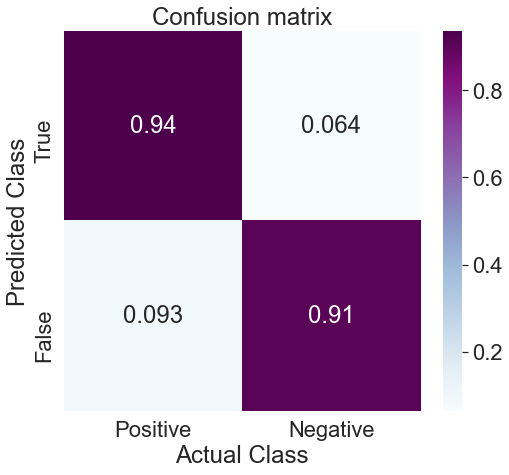

In [169]:
    
count_tp = 0
count_tn = 0

count_fp = 0
count_fn = 0

for rand_int in range(600):

    input_v = np.append(X_test[rand_int],1)
    input_v = np.reshape(input_v, (-1, len(input_v)))
    
    actual_l = np.zeros(oput_len)
    actual_l[Y_test[rand_int]] = 1
    
    y_ = input_v.dot(u)
    y = sigmoid(y_)
    y = np.reshape(np.append(y, 1), (-1, len(np.append(y,1))))
    
    z_ = y.dot(v)
    z = sigmoid(z_)
    z = np.reshape(np.append(z, 1), (-1, len(np.append(z,1))))
    
    h_ = z.dot(w)
    h = sigmoid(h_) 
    
    
    output_l = np.zeros(oput_len)
    output_l[np.argmax(h)] = 1
    
    # print(actual_l)
    # print(output_l)
    
    dE_dh = actual_l - output_l
      
    if Y_test[rand_int] == 1 and np.sum(dE_dh**2) == 0: count_tp += 1
    
    if Y_test[rand_int] == 1 and np.sum(dE_dh**2) != 0: count_fp += 1
    
    if Y_test[rand_int] == 0 and np.sum(dE_dh**2) == 0: count_tn += 1
    
    if Y_test[rand_int] == 0 and np.sum(dE_dh**2) != 0: count_fn += 1

            
    
print(count_tp)
print(count_tn)
print(count_fp)
print(count_fn)

precision_tp = count_tp/(count_tp + count_fp)
precision_tn = count_tn/(count_tn + count_fn)
precision_fp = count_fp/(count_fp + count_tp)
precision_fn = count_fn/(count_fn + count_tn)

print(precision_tp)
print(precision_tn)
print(precision_fp)
print(precision_fn)

array = [[precision_tp,precision_fp],[precision_fn,precision_tn]]

df_cm = pd.DataFrame(array, ['True','False'], ['Positive','Negative'])

plt.figure(figsize = (8,7))
plt.title('Confusion matrix')
sn.heatmap(df_cm, cmap="BuPu", annot=True)
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class')
plt.show()



